# Polynomial regression

The example below uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test
    - Create an evaluation function
2. Second experiment
    - Repeat with `degree` varying from 2 to 4: 
        - Use the sklearn function _PolynomialFeature_ to create a new array of features with degree `degree`. Set _include_bias=False_
        - Train a Linear regression model with the new features on the training dataset
        - Evaluate the model on the test dataset
        - Visualize the predicted values of the model
        - Collect the predictions for the final graphic figure
    - Show a figure with data and all the predictions
6. Compare the evaluation of each model


In [7]:
# Code source: Filippo Orazi
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [8]:
try:
  from google.colab import files
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
    uploaded = files.upload()


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [11]:
data_fn = '../../exercises/Lab-topic-4-regression/power_demand_vs_temperature.csv'
df0 = pd.read_csv(data_fn, index_col=0)
df0.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [12]:
df0.describe(include='all')

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [13]:
print(f"The dataframe has {df0.shape[0]-df0.dropna().shape[0]} invalid rows")

The dataframe has 0 invalid rows


### Create X and y

In [14]:
X = df0.drop("demand", axis=1)
y = df0["demand"]
print(f"X has shape{X.shape}")
print(f"Y has shape{y.shape}")

X has shape(1096, 1)
Y has shape(1096,)


### Plot the distribution



In [15]:
import warnings
warnings.filterwarnings("ignore")

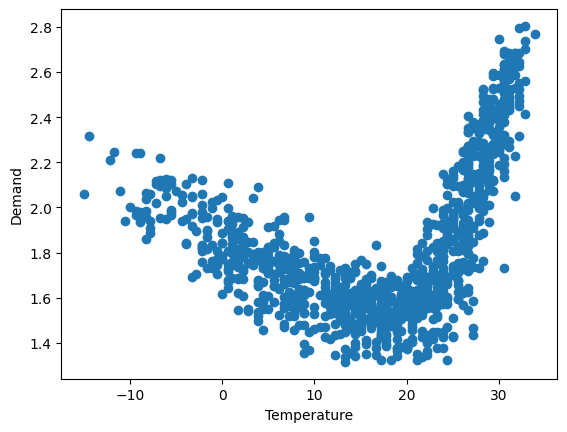

In [16]:
plt.scatter(X,y)
plt.xlabel("Temperature");
plt.ylabel("Demand");
plt.show()

### Divide the dataset in train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state, train_size=0.7)
print('Training set and test set have {} and {} elements respectively'.format(X_train.shape[0],X_test.shape[0]))

Training set and test set have 767 and 329 elements respectively


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [18]:
def f_test(y_true, y_pred, n_var, n_obs):
    """ Computation of F-statistic and p-value for the regression
    http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
    Requires: np (numpy) and scipy.stats

    Arguments:
    y_true: ground truth
    y_pred: predictions
    n_var: number of predicting variables
    n_obs: number of observations (the length of y_true and y_pred)

    Returns:
    F: F statistics
    p: p-value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic
    return F, p

def print_eval(X, y, model):
    """ Predicts for X given a fitted model and
        prints prediction quality with respect to y
    Requires f_test (returning F and p-value), mean_squared_error, r2_score

    Arguments:
    X : array-like predicting data
    y : ground truth
    model: predictor fitted model

    Return: MSE, r2_score, F, p-value
    """
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(y,pred), F, p


## First experiment
Create a linear model

Train the model on X_train and y_train

Evaluate the model on X_test and y_test


In [19]:
results = {} # prepare a dictionary that will contain the results of the experiments

In [20]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
results['linear'] = print_eval(X_test, y_test, lmodel)

 Mean squared error: 	0.10165
 r2 score: 		0.16809
 f-statistic: 		44.576
 p-value: 		1.0503e-10


#### Visualize the prediction of the model

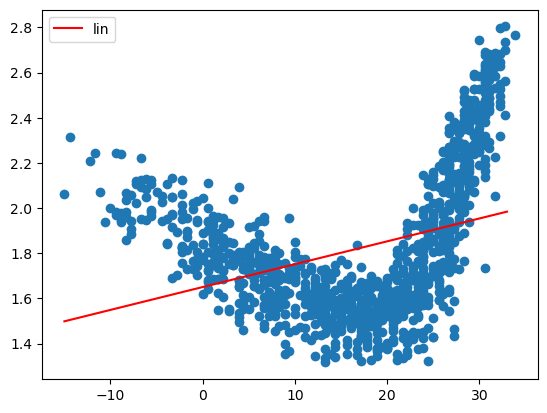

In [13]:
lpred = lmodel.predict(np.arange(min(X.temp), max(X.temp)).reshape(-1,1))
plt.plot(np.arange(min(X.temp), max(X.temp)),lpred, label = "lin", color = "red")
plt.legend()
plt.scatter(X,y)
plt.show();

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a polynomial regression model with varying degree.

- Repeat with `degree` varying from 2 to 4: 
    - Use the sklearn function _PolynomialFeature_ to create a new array of features with degree `degree`. Set _include_bias=False_
    - Train a Linear regression model with the new features on the training dataset
    - Evaluate the model on the test dataset
    - Visualize the predicted values of the model
    - Collect the predictions for the final graphic figure
- Show the figure with data and all the predictions


Polynomial with degree 2
 Mean squared error: 	0.033456
 r2 score: 		0.72619
 f-statistic: 		384.89
 p-value: 		1.1102e-16
Polynomial with degree 3
 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16
Polynomial with degree 4
 Mean squared error: 	0.021334
 r2 score: 		0.8254
 f-statistic: 		390.05
 p-value: 		1.1102e-16


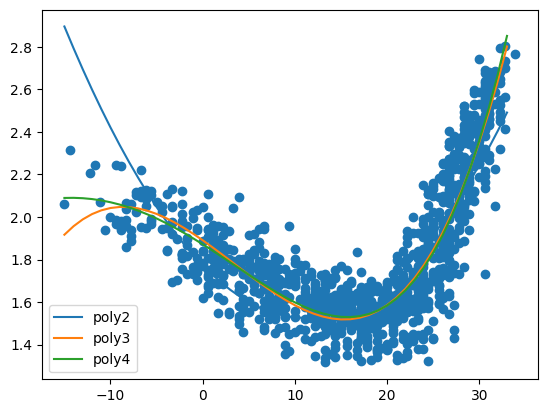

In [21]:
degrees = list(range(2,5))
for degree in degrees:
  polFea = PolynomialFeatures(degree,include_bias=False)
  X_poly = polFea.fit_transform(X_train.values)#.reshape(-1,1))
  model = LinearRegression()
  model.fit(X_poly, y_train);
  print("Polynomial with degree {}".format(degree))
  results['polynomial'+str(degree)] = print_eval(polFea.transform(X_test), y_test, model)
  pred = model.predict(polFea.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
  plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly"+str(degree))
  plt.legend()
plt.scatter(X,y)
plt.show();

## Compare the performance of the four models

In [15]:
pd.options.display.float_format = '{:,.5f}'.format
res = pd.DataFrame(results, index = ['rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])
res

,linear,polynomial2,polynomial3,polynomial4
rmse,0.10165,0.03346,0.02175,0.02133
r2,0.16809,0.72619,0.82200,0.82540
f-statistic,44.57638,384.88651,502.31829,390.04543
p-value,0.00000,0.00000,0.00000,0.00000


## Comments
- **rmse** is much smaller in the polynomial experiments than in the linear one, therefore the polynomial regressions are better
- the values of R<sup>2</sup> confirm the previous observation
- the values of the **f-statistics** confirm the previous observation
- the **p-values** are extremely low in all the experiments, therefore all the models are *statistically significant*

# Appendix: interpretation of the measures

## **RMSE** 
The **Root Mean Squared Error** is a measure of the average magnitude of the errors between predicted and observed values in a regression model. It provides an indication of how well the model is performing in terms of predicting the dependent variable. Here's how you can interpret RMSE in a regression model:

1. **Scale of the RMSE:**
   - RMSE is expressed in the same units as the dependent variable. For example, if your dependent variable is in dollars, the RMSE will also be in dollars.

2. **Magnitude of the RMSE:**
   - A lower RMSE indicates better model performance. It means that, on average, the model's predictions are closer to the actual values.

3. **Comparison with the Range of the Dependent Variable:**
   - You can compare the RMSE with the range of the dependent variable to get a sense of the relative performance. If the RMSE is small compared to the range of the dependent variable, it suggests good predictive performance.

4. **Relative Comparison:**
   - If you have multiple models, compare their RMSE values. The model with the lower RMSE is generally considered better at predicting the dependent variable.

5. **Practical Significance:**
   - Consider the practical significance of the RMSE. Sometimes, a model may have a statistically significant improvement in RMSE but the improvement might not be practically significant or meaningful in the real-world context. Always interpret the RMSE in the context of your specific application.

6. **Outliers:**
   - Be aware that RMSE is sensitive to outliers. If your data has outliers, they can disproportionately influence the RMSE. In such cases, consider using other evaluation metrics or addressing outliers in your data.

In summary, a lower RMSE generally indicates better model performance, but the interpretation should be context-specific. Always consider the nature of your data and the goals of your analysis when assessing the significance of the RMSE in a regression model. Additionally, it's often helpful to use multiple evaluation metrics and consider other factors like the model's interpretability and practical utility.

## **R2**
The **coefficient of determination**, often denoted as R-squared (R²), is a statistical measure in regression analysis that represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here's how you can interpret R² in a regression model:

1. **Percentage of Variance Explained:**
   - R² is expressed as a percentage and ranges from 0% to 100%. A higher R² indicates that a larger proportion of the variance in the dependent variable is explained by the independent variables in the model.

2. **Interpretation of R² Values:**
   - R² values can be interpreted as follows:
      - 0%: The model does not explain any of the variability in the dependent variable.
      - 100%: The model explains all of the variability in the dependent variable.
      - Values in between: The model explains a certain percentage of the variability, with higher values indicating better explanatory power.

3. **Comparison with a Null Model:**
   - You can compare the R² of your model with the R² of a null model. The null model typically predicts the mean or a constant value for the dependent variable. If your model's R² is significantly higher than that of the null model, it suggests that your model provides a better fit than a simple mean-based model.

4. **Limitations of R²:**
   - R² does not indicate the goodness of fit in an absolute sense. A high R² does not necessarily mean that the model is good or that the predictions are accurate; it only reflects the proportion of variance explained.
   - R² does not reveal whether the coefficient estimates are unbiased or whether the model meets other assumptions of regression analysis.

5. **Contextual Interpretation:**
   - Always interpret R² in the context of your specific application. Depending on the nature of your data and the goals of your analysis, a particular level of R² may be considered acceptable or inadequate.

It's important to note that while R² is a useful metric, it should be complemented with other evaluation measures, and the interpretation should consider the specific context of the regression analysis. Additionally, R² is sensitive to the number of predictors, and adjusted R² (which penalizes the inclusion of unnecessary predictors) may be considered in situations with multiple independent variables.

## **p-value**
In regression analysis, the p-value is a measure that helps you assess the statistical significance of the coefficients of the independent variables in your model. It is associated with hypothesis testing and provides information about whether a particular variable has a significant effect on the dependent variable.

Here's a general guideline on interpreting the p-value in a regression model:

**Null Hypothesis (H₀)**: <br>
The null hypothesis for each independent variable is that there is no relationship between that variable and the dependent variable.
Alternate Hypothesis (H₁): The alternate hypothesis is that there is a significant relationship between the independent variable and the dependent variable.

**P-value Interpretation**: <br>
A low p-value (typically ≤ 0.05) suggests that you can reject the null hypothesis. In other words, there is enough evidence to conclude that there is a statistically significant relationship between the independent variable and the dependent variable.
A high p-value (> 0.05) suggests that you fail to reject the null hypothesis. This indicates that there is not enough evidence to conclude that the independent variable has a significant effect on the dependent variable.

**Decision Rule**: <br>
If p-value ≤ α (usually 0.05), reject the null hypothesis.
If p-value > α, fail to reject the null hypothesis.

**Implications**: <br>
If you reject the null hypothesis, it implies that the variable is likely to have a significant impact on the dependent variable.
If you fail to reject the null hypothesis, it suggests that there is not enough evidence to support a significant relationship between the independent variable and the dependent variable.
It's important to note that a significant p-value does not imply the strength or practical significance of the relationship; it only indicates the statistical significance. Additionally, a non-significant p-value does not prove the absence of a relationship; it simply means that the evidence is not strong enough to claim significance.

Always consider the context of your study and the specific assumptions and limitations associated with your regression model when interpreting p-values.

## **F statistics**
The F-statistic in a regression model is used to test the overall significance of the model. It assesses whether the regression model, as a whole, provides a better fit to the data than a model with no independent variables (i.e., a model that predicts the dependent variable using only a constant term).

Here's how you can interpret the F-statistic in a regression model:

1. **Null Hypothesis (H₀):**
   - The null hypothesis is that all the coefficients of the independent variables in the model are equal to zero, meaning that these variables do not have a significant impact on predicting the dependent variable.

2. **Alternate Hypothesis (H₁):**
   - The alternate hypothesis is that at least one of the coefficients of the independent variables is not equal to zero, indicating that the model as a whole is significant.

3. **F-Statistic and Significance Level (α):**
   - The F-statistic is calculated as the ratio of the variance explained by the model to the variance not explained. The larger the F-statistic, the more evidence there is against the null hypothesis.
   - To assess the statistical significance, compare the calculated F-statistic to a critical value from an F-distribution table at a chosen significance level (α), typically 0.05.

4. **Decision Rule:**
   - If the calculated F-statistic is greater than the critical value, you reject the null hypothesis. This suggests that the regression model is statistically significant, and at least one independent variable has a significant impact on the dependent variable.
   - If the calculated F-statistic is not greater than the critical value, you fail to reject the null hypothesis. This implies that the model, as a whole, is not statistically significant.

5. **Interpretation:**
   - A significant F-statistic indicates that the overall model provides a better fit to the data than a model with no predictors. It doesn't identify which specific predictors are significant, but it suggests that there is evidence that at least one predictor has a non-zero coefficient.

It's important to note that a significant F-statistic does not guarantee that each individual coefficient is significant. After establishing the overall significance of the model, you may want to examine the significance of individual coefficients using t-tests.

In summary, the F-statistic is a global test of the significance of the regression model, providing insight into whether the inclusion of independent variables collectively improves the model's ability to explain the variability in the dependent variable.

## Observing F statistics and p-value together
The F-statistic and p-value are related statistical measures used in hypothesis testing, specifically in the context of regression analysis. However, they serve different purposes and convey distinct information:

1. **F-Statistic:**
   - The F-statistic is a measure of the overall significance of the regression model. It tests whether the model, which includes one or more independent variables, is statistically different from a model with no predictors (i.e., a model that predicts the dependent variable using only a constant term).
   - The formula for the F-statistic involves the ratio of the variance explained by the model to the variance not explained.
   - A large F-statistic indicates that the regression model is statistically significant, suggesting that at least one independent variable has a significant impact on the dependent variable.

2. **P-Value:**
   - The p-value associated with the F-statistic is a measure of the probability of obtaining the observed F-statistic (or a more extreme value) if the null hypothesis is true. In the context of regression, the null hypothesis is typically that all coefficients of the independent variables are equal to zero.
   - A small p-value (usually ≤ 0.05) indicates that there is enough evidence to reject the null hypothesis. This implies that the regression model is statistically significant, and at least one independent variable has a significant impact on the dependent variable.
   - A large p-value suggests that there is not enough evidence to reject the null hypothesis, indicating that the model, as a whole, is not statistically significant.

In summary, the F-statistic assesses the overall significance of the regression model, while the p-value associated with the F-statistic indicates the level of significance. Both are crucial in hypothesis testing, and they work together to help you make decisions about the significance of the regression model. If the F-statistic is large and the associated p-value is small, it suggests that the model is statistically significant. If the p-value is large, it implies that the model might not be statistically significant.

(Source: ChatGPT answers to several questions)